# Linear system with one control input

## Step 1

Consider the following to a second order ODE:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
$$

The eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = 1$, so unstable. 

## Step 2

Now let's consider the same system, but with control input:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u
$$

Let us chose that $u = -2x_1$, in other words:

$$
u = 
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

Then we can re-write this as:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
-2 & 0 \\ 0 & 0
\end{pmatrix}
x
$$


$$
\dot x = 
\begin{pmatrix} 
-1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

Now the eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = -1$, so stable. 

In [ ]:

import numpy as np
from numpy.linalg import eig

A = np.array([[1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

A = np.array([[-1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]
eigenvalues of A: [-10.  -1.]


# Pole placement

There is a technique for finding suitable $K$ matrix that would produced desired eigenvalues of the $A - BK$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A = np.array([[1, 0], [-5, -10]])
B = np.array([[1], [0]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[ -6.  -14.4]]
eigenvalues of A - B*K: [-1. -2.]


In [ ]:
#desired eigenvalues
poles = np.array([-100, -200])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#notice how different the gain matrix is!

K: [[  291. -3420.]]
eigenvalues of A - B*K: [-200. -100.]


## Task 1.1 Make the following systems stable, proposing appropriate control


$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 \\ 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 \\ 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 \\ 5
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 \\ 10
\end{pmatrix}
u
$$

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A1 = np.array([[10, 0], [-5, 10]])
B1 = np.array([[2], [0]])
A2 = np.array([[0, -8], [1, 30]])
B2 = np.array([[-2], [1]])
A3 = np.array([[2, 2], [-6, 10]])
B3 = np.array([[0], [5]])
A4 = np.array([[5, -5], [6, 15]])
B4 = np.array([[-10], [10]])

A = [A1, A2, A3, A4]
B = [B1, B2, B3, B4]

#desired eigenvalues
poles = np.array([-1, -2])

for i in range(len(A)):
  place_obj = place_poles(A[i], B[i], poles)
  K = place_obj.gain_matrix;
  print(i + 1, "K:", K)
  e, v = eig((A[i] - B[i].dot(K)))
  print("eigenvalues of", i + 1, "system after control applied", e)

1 K: [[ 11.5 -13.2]]
eigenvalues of 1 system after control applied [-2. -1.]
2 K: [[ 1.25 35.5 ]]
eigenvalues of 2 system after control applied [-1. -2.]
3 K: [[1.42108547e-15 3.00000000e+00]]
eigenvalues of 3 system after control applied [-1. -2.]
4 K: [[-15.  -12.7]]
eigenvalues of 4 system after control applied [-2. -1.]


## Task 1.2 Make the following systems stable, proposing appropriate control

$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 & 1 \\ 0 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 & 1 \\ 1 & 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 & -1 \\ 5 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 & 3 \\ 10 & 3
\end{pmatrix}
u
$$

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A1 = np.array([[10, 0], [-5, 10]])
B1 = np.array([[2, 1], [0, -1]])
A2 = np.array([[0, -8], [1, 30]])
B2 = np.array([[-2, 1], [1, 1]])
A3 = np.array([[2, 2], [-6, 10]])
B3 = np.array([[0, -1], [5, -1]])
A4 = np.array([[5, -5], [6, 15]])
B4 = np.array([[-10, 3], [10, 3]])

A = [A1, A2, A3, A4]
B = [B1, B2, B3, B4]

#desired eigenvalues
poles = np.array([-1, -2])

for i in range(len(A)):
  place_obj = place_poles(A[i], B[i], poles)
  K = place_obj.gain_matrix;
  print(i + 1, "K:", K)
  e, v = eig((A[i] - B[i].dot(K)))
  print("eigenvalues of", i + 1, "system after control applied", e)

1 K: [[  3.5   5.5]
 [  5.  -11. ]]
eigenvalues of 1 system after control applied [-1. -2.]
2 K: [[-0.33333333 13.        ]
 [ 1.33333333 18.        ]]
eigenvalues of 2 system after control applied [-2. -1.]
3 K: [[-2.   1.8]
 [-4.  -2. ]]
eigenvalues of 3 system after control applied [-2. -1.]
4 K: [[-0.05        1.05      ]
 [ 2.16666667  1.83333333]]
eigenvalues of 4 system after control applied [-2. -1.]


## Task 1.3 Give example of an unstable system that can't be stabilized...

of the form $\dot x = 
Ax+Bu$, where $A \in \mathbb{R}^{2 \times 2}$

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$
* where $B \in \mathbb{R}^{2 \times 3}$

$B \in \mathbb{R}^{2 \times 1}$
$$\dot x = 
\begin{pmatrix} 2 & 1 \\ 0 & 1
\end{pmatrix}
x
+
\begin{pmatrix} 
2 \\ 0
\end{pmatrix}
u
$$

$B \in \mathbb{R}^{2 \times 2}$
$$\dot x = 
\begin{pmatrix} 2 & 2 \\ 0 & 0
\end{pmatrix}
x
+
\begin{pmatrix} 
2 & 4 \\ 0 & 0
\end{pmatrix}
u
$$

$B \in \mathbb{R}^{2 \times 3}$
$$\dot x = 
\begin{pmatrix} 3 & 7 \\ 0 & 5
\end{pmatrix}
x
+
\begin{pmatrix} 
1 & 2 & 3 \\ 0 & 0 & 0
\end{pmatrix}
u
$$


In [ ]:
#prove that the chosen system cannot be stabilized
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A = np.array([[3, 7], [0, 5]])
B = np.array([[1, 2 , 3], [0, 0, 0]])

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

ValueError: ignored

# Root locus

Consider the following question: given system $\dot x = Ax+Bu$ and control $u = 
-Kx$, how does the change in $K$ changes the eigenvalues of theresulting matrix $(A - BK)$?

Root locus method is drawing the graph of eigenvalues of the matrix $(A - BK)$ for a given change of matrix $K$. We only vary a single component of $K$, so the result is a line.

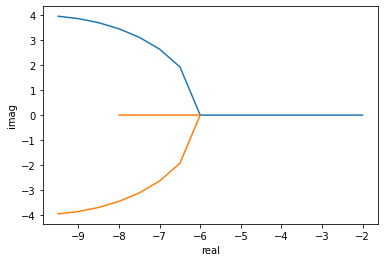

In [ ]:
import matplotlib.pyplot as plt

A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
K0 = np.array([[1, 1]]);

k_min = 1;
k_max = 10;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]

    ei, v = eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plt.plot(E[:, 0], E[:, 1])
plt.plot(E[:, 2], E[:, 3])
plt.xlabel('real')
plt.ylabel('imag')
plt.show()


## Task 2.1 Plot root locus

* For a system with $A$ with imaginary eigenvalues
* For a system with $A$ with real eigenvalues
* For a system where real parts of eigenvalues of $(A - BK)$ are all positive
* For a system where real parts of eigenvalues of $(A - BK)$ are all negative

M:
[[ 0  3]
 [-1  0]]
N:
[[-6  2]
 [ 4  4]]
P:
[[-2 -6]
 [-3  5]]
eigenvalues of A:  [0.+1.73205081j 0.-1.73205081j]
eigenvalues of A-B*K [-1.+28.14249456j -1.-28.14249456j]


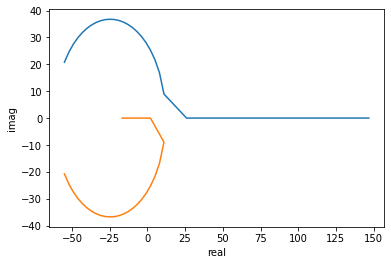

M:
[[ 1  7]
 [ 9 -8]]
N:
[[-7  9]
 [-6  9]]
P:
[[ 8  8]
 [-7 -1]]
eigenvalues of A:  [  5.6241438 -12.6241438]
eigenvalues of A-B*K [184. -15.]


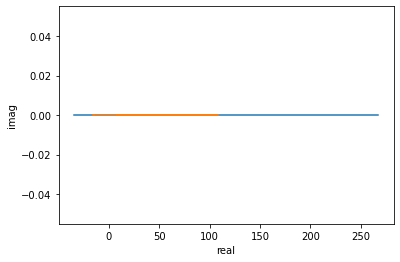

M:
[[5 4]
 [7 7]]
N:
[[-5 -8]
 [-4 -4]]
P:
[[ 8 -2]
 [ 6  0]]
eigenvalues of A:  [ 0.61483519 11.38516481]
eigenvalues of A-B*K [88.79018579  3.20981421]


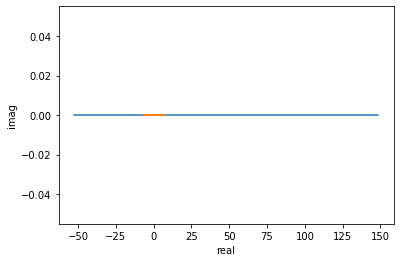

M:
[[-5  9]
 [-5  1]]
N:
[[  1  -4]
 [-10   9]]
P:
[[-9 -6]
 [ 8  2]]
eigenvalues of A:  [-2.+6.j -2.-6.j]
eigenvalues of A-B*K [-20.5+25.47057125j -20.5-25.47057125j]


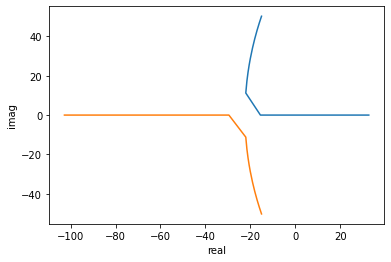

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

A = []
B = []
K = []
K0 = np.array([[1, 1]]);

k_min = -20;
k_max = 20;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

def root_locus_plot(M,N,P):
  E = np.zeros((Count, 4))

  for i in range(Count):
      P[0, 0] = k_range[i]
      ei, v = eig((M - N.dot(P)))

      E[i, 0] = np.real(ei[0])
      E[i, 1] = np.imag(ei[0])
      E[i, 2] = np.real(ei[1])
      E[i, 3] = np.imag(ei[1])

      #print("eigenvalues of A - B*K:", ei)


  plt.plot(E[:, 0], E[:, 1])
  plt.plot(E[:, 2], E[:, 3])
  plt.xlabel('real')
  plt.ylabel('imag')
  plt.show()

def pred1(M, N, P):
  e = eig(M)[0]
  return all(val != 0 for val in e.imag) and all(val == 0 for val in e.real)

def pred2(M, N , P):
  e = eig(M)[0]
  return all(val == 0 for val in e.imag) and all(val != 0 for val in e.real)

def pred3(M, N, P):
  e = eig(M-N.dot(P))[0]
  return all(val > 0 for val in e.real)

def pred4(M, N, P):
  e = eig(M-N.dot(P))[0]
  return all(val < 0 for val in e.real)

pred = [pred1, pred2, pred3, pred4]

for k in range(4):
  M = np.random.randint(-10, 10, (2,2))
  N = np.random.randint(-10, 10, (2,2))
  P = np.random.randint(-10, 10, (2,2))
  while not pred[k](M, N, P):
    M = np.random.randint(-10, 10, (2,2))
    N = np.random.randint(-10, 10, (2,2))
    P = np.random.randint(-10, 10, (2,2))
  # A.append(M)
  # B.append(N)
  # K.append(P)
  print("M:",M,"N:", N,"P:", P, sep='\n')
  print("eigenvalues of A: ", eig(M)[0])
  print("eigenvalues of A-B*K", eig(M-N.dot(P))[0])
  root_locus_plot(M,N,P)


# Reaction to inputs

## Task 3 Step functions

### Task 3.1 Simulate one of the given systems with a step function as an imput.

### Task 3.2 Linear combination of solutions

Simulate one of the given systems with two different step functions $f_1$,  $f_2$ as an imput, and as a sum of those $f_1+f_2$ as an imput. Compare the sum of the solutions for the $f_1$,  $f_2$ with the solution for $f_1+f_2$.

$$ f_1 = 
\begin{cases} 
1, \ \ \ t \geq t_1 \\
0, \ \ \ t < t_1
\end{cases} 
$$
$$ f_2 = 
\begin{cases} 
1, \ \ \ t \geq t_2 \\
0, \ \ \ t < t_2
\end{cases} 
$$

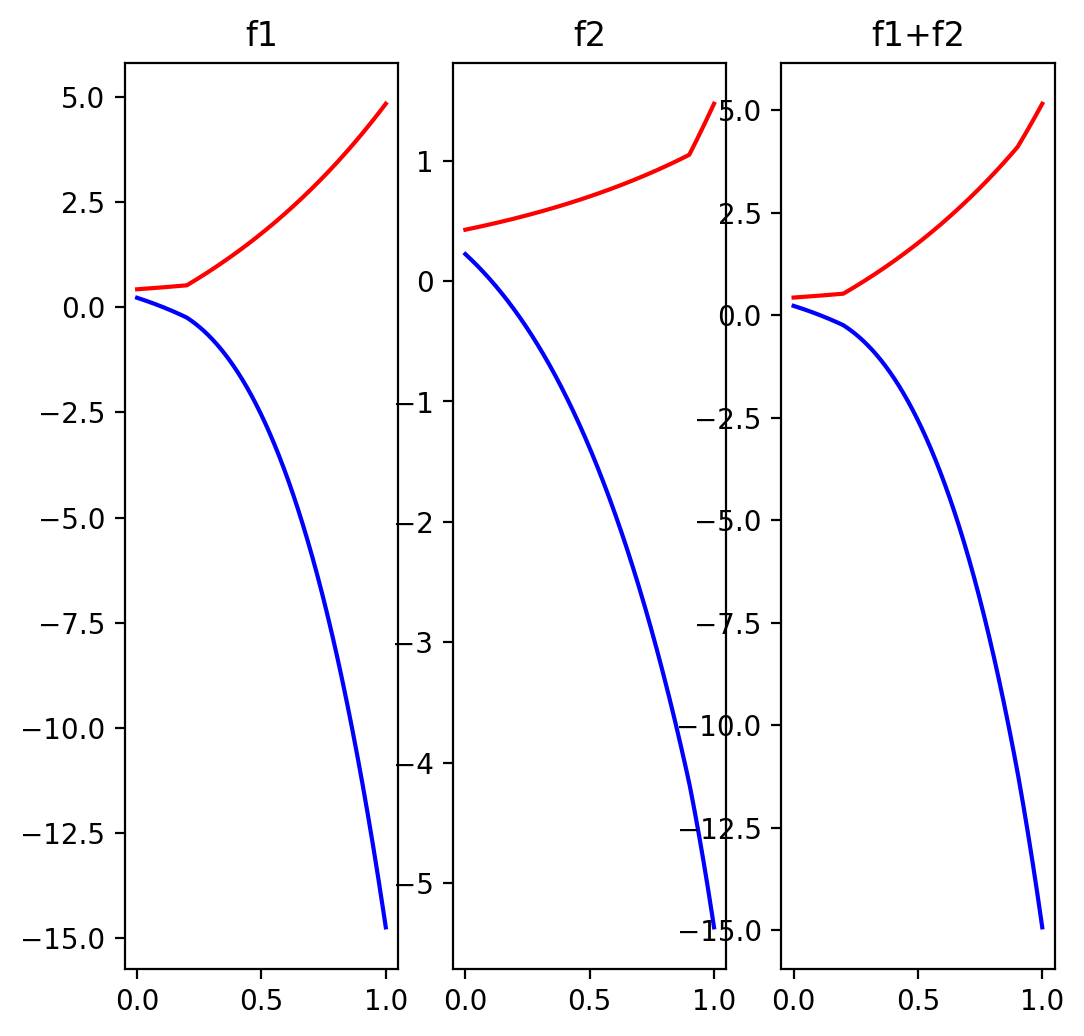

In [17]:
#3.1
import numpy as np
from scipy import signal
from scipy.integrate import odeint

import matplotlib.pyplot as plt

t1 = 0.2
t2 = 0.9

n = 2
A = np.array([[1.0, 0.0], [-5.0, 1.0]])
B = np.array([[2.0, 1.0], [0.0, -1.0]])
C = np.eye(2, dtype= float)
D = np.zeros(shape=(2,2), dtype=float)

f1 = lambda t: np.array([1.0, 1.0]) if t>=t1 else [0,0]

f2 = lambda t: np.array([1.0, 1.0]) if t>=t2 else [0,0]

time = np.linspace(0, 1, 1000)
x0 = np.random.rand(n)  # initial state

sys = signal.StateSpace(A,B,C,D)
u1 = np.array(list(map(f1, time)))
u2 = np.array(list(map(f2, time)))
u3 = u1 + u2

# print(u3.shape)

tout1, x1, y1 = signal.lsim(system=sys,U=u1,T=time, X0=x0)
tout2, x2, y2 = signal.lsim(sys,u2,time, X0=x0)
tout3, x3, y3 = signal.lsim(sys,u3,time, X0=x0)

fig = plt.figure(figsize=(6,6), dpi=200)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title('f1')
ax1.plot(time, x1[:, 0],'r')
ax1.plot(time, x1[:, 1],'b')

ax2.set_title('f2')
ax2.plot(time, x2[:, 0],'r')
ax2.plot(time, x2[:, 1],'b')

ax3.set_title('f1+f2')
ax3.plot(time, x3[:, 0],'r')
ax3.plot(time, x3[:, 1],'b')
plt.show()

## Task 4 Sinusoidal inputs

Simulate one of the prevuiously given function for a sinusoidal input $u = sin(wt)$.

How does the choice of $w$ affects the result?

(not graded):
Watch [video](https://youtu.be/bU7y051Ejgw) on "frequency responce" and find how you could use the proposed method to analyse the effect of $w$ in your problem.

Now, let us see how to plot ferquency responce in a plot, via scipy library:

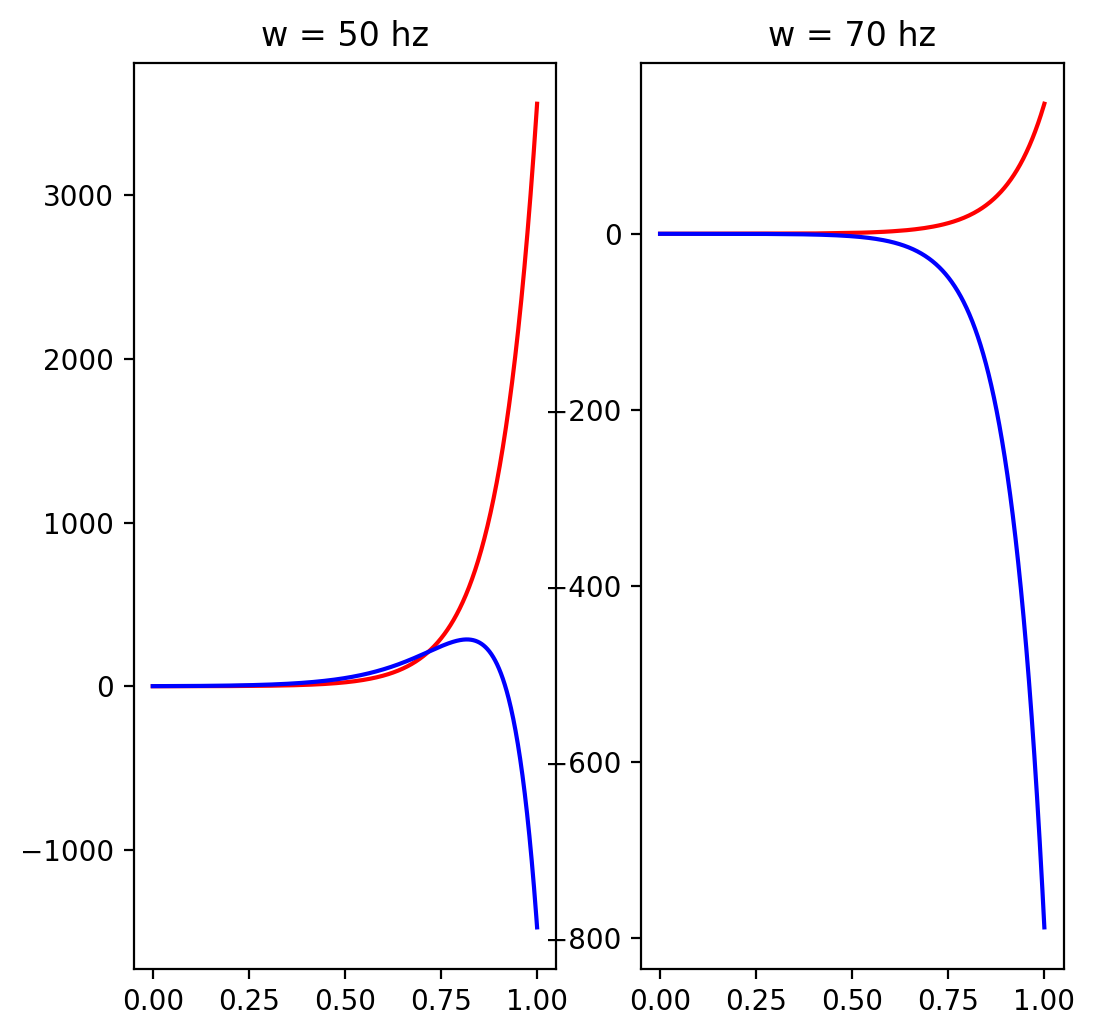

In [ ]:
#simulation with u = sin(wt)

#4.1
import numpy as np
from scipy import signal
from scipy.integrate import odeint

import matplotlib.pyplot as plt

t1 = 0.2
t2 = 0.9

n = 2
A = np.array([[10.0, 0.0], [-5.0, 10.0]])
B = np.array([[2.0, 1.0], [0.0, -1.0]])
C = np.eye(2, dtype= float)
D = np.zeros(shape=(2,2), dtype=float)

f1 = lambda t: [np.sin(2*50*np.pi*t), np.sin(2*50*np.pi*t)] 

f2 = lambda t: [np.sin(2*70*np.pi*t), np.sin(2*70*np.pi*t)]

time = np.linspace(0, 1, 1000)
x0 = np.random.rand(n)  # initial state

sys = signal.StateSpace(A,B,C,D)
u1 = np.array(list(map(f1, time)))
u2 = np.array(list(map(f2, time)))

# print(u3.shape)

tout1, x1, y1 = signal.lsim(system=sys,U=u1,T=time, X0=x0)
tout2, x2, y2 = signal.lsim(sys,u2,time)


fig = plt.figure(figsize=(6,6), dpi=200)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('w = 50 hz')
ax1.plot(tout1, x1[:, 0],'r')
ax1.plot(tout1, x1[:, 1],'b')

ax2.set_title('w = 70 hz')
ax2.plot(tout2, x2[:, 0],'r')
ax2.plot(tout2, x2[:, 1],'b')

plt.show()

num: [[ 0.  1. 10.]
 [ 0.  0.  2.]]
den: [1. 9. 4.]


Text(0.5, 0, 'Frequency [rad/sample]')

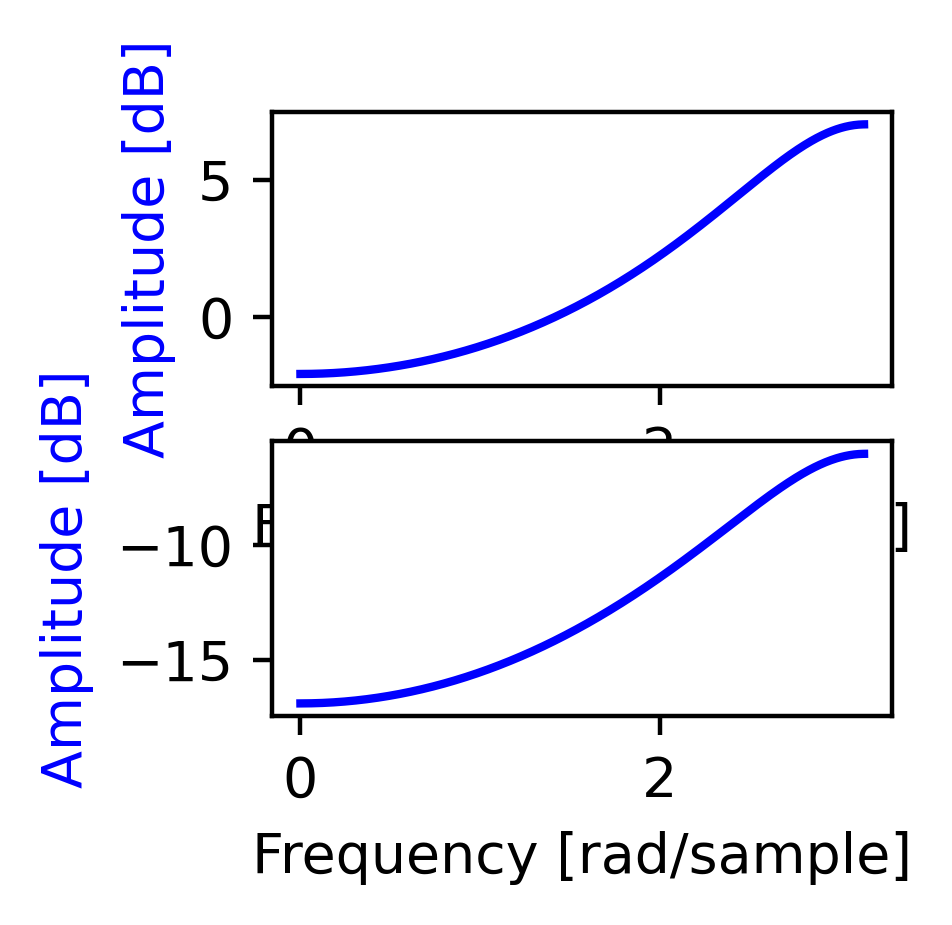

In [ ]:
from scipy.signal import ss2tf
from scipy.signal import freqz


A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
C = np.eye(2)
D = np.zeros((2, 1))

num, den = ss2tf(A, B, C, D)

print("num:", num)
print("den:", den)

w1, h1 = freqz(num[0, :], den)
w2, h2 = freqz(num[1, :], den)

fig = plt.figure(figsize=(2,2), dpi=400)
ax1 = fig.add_subplot(211)
ax1.plot(w1, 20 * np.log10(abs(h1)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = fig.add_subplot(212)
ax2.plot(w2, 20 * np.log10(abs(h2)), 'b')
ax2.set_ylabel('Amplitude [dB]', color='b')
ax2.set_xlabel('Frequency [rad/sample]')

## Task 4.1 Make frequency diagrams for 2 of the systems you studied in the tasks 1.1 and 1.2

num: [[  0.   2. -20.]
 [  0.   0. -10.]]
den: [  1. -20. 100.]
num: [[ 0. -2. 52.]
 [ 0.  1. -2.]]
den: [  1. -30.   8.]


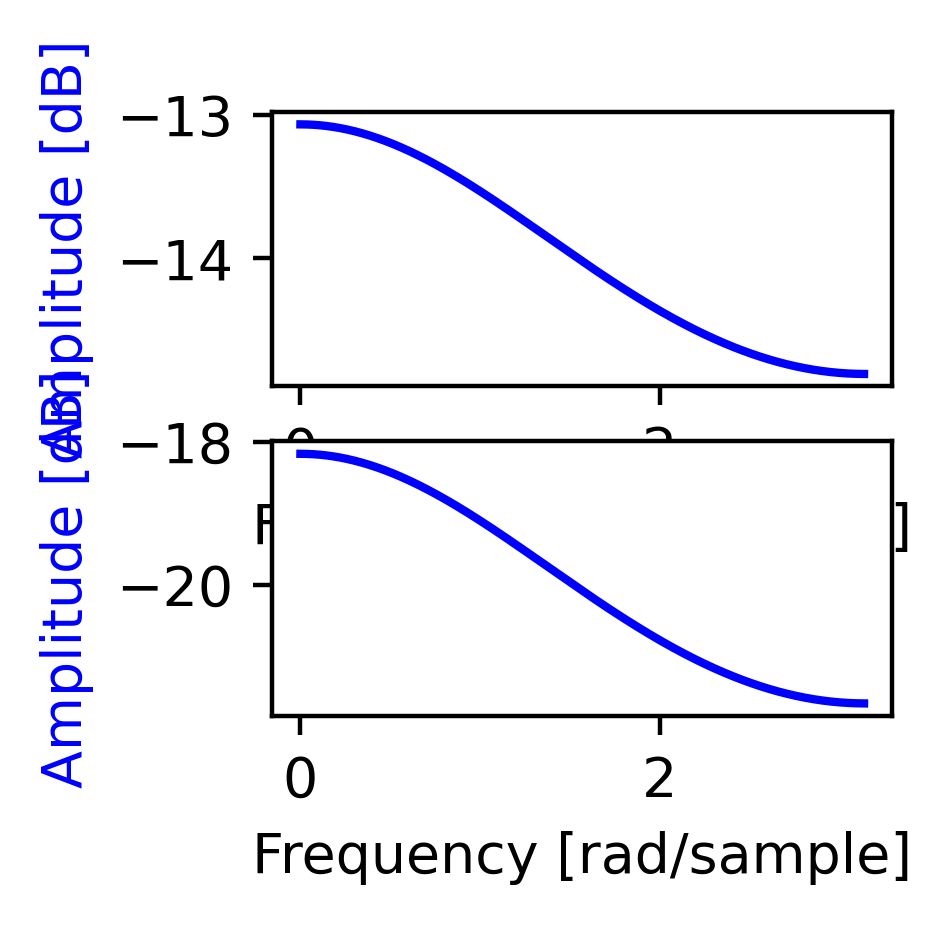

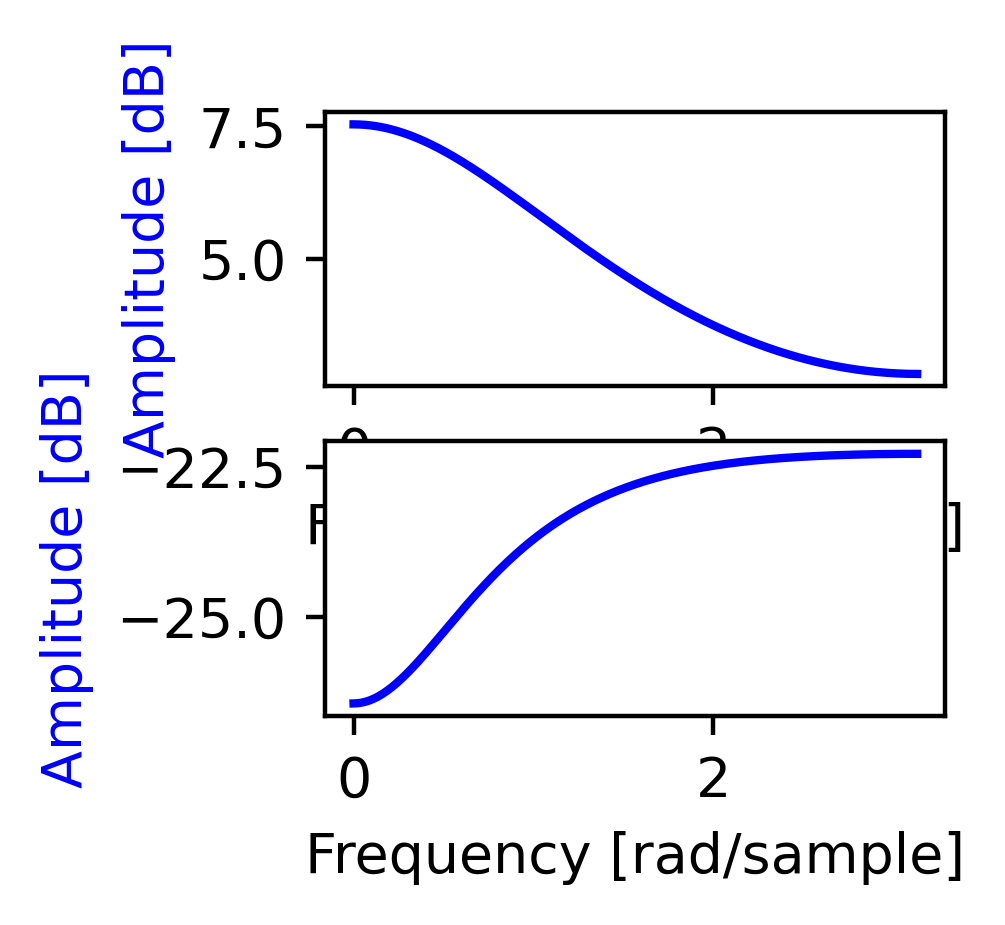

In [ ]:
from scipy.signal import ss2tf
from scipy.signal import freqz


A1 = np.array([[10, 0], [-5, 10]])
B1 = np.array([[2], [0]])
C1 = np.eye(2)
D1 = np.zeros((2,1))

A2 = np.array([[0, -8], [1, 30]])
B2 = np.array([[-2, 1], [1, 1]])
C2 = np.eye(2)
D2 = np.zeros((2,2))

def freq_plot(A,B,C,D):
  num, den = ss2tf(A, B, C, D)

  print("num:", num)
  print("den:", den)

  w1, h1 = freqz(num[0, :], den)
  w2, h2 = freqz(num[1, :], den)

  fig = plt.figure(figsize=(2,2), dpi=400)
  
  ax1 = fig.add_subplot(211)
  ax1.plot(w1, 20 * np.log10(abs(h1)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [rad/sample]')

  ax2 = fig.add_subplot(212)
  ax2.plot(w2, 20 * np.log10(abs(h2)), 'b')
  ax2.set_ylabel('Amplitude [dB]', color='b')
  ax2.set_xlabel('Frequency [rad/sample]')

freq_plot(A1,B1,C1,D1)
freq_plot(A2,B2,C2,D2)

# 5. Point-to-point control

Given system:

$$\dot x = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u
$$

let us drive it towards the point $x^* = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

We define our control as:

$$u = 
-K (x - x^*) + u^*
$$

## Step 1 - Feed-forward design

We know that $\dot x^* = 0$ and that at the node our dynamics obtains the form:

$$0 = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$

In other words, $u^* = 5$.

## Step 2

We define control error as $e = x - x^*$. 


Now we write error dynamics:

$$\dot x - \dot x^* = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
 - 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x^*
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
(-K (x - x^*) + u^*)
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$


$$\dot e = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
e
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
K e
$$


## Step 3 - feedback design

In [ ]:

A = np.array([[10, 5], [-5, -10]])
B = np.array([[-1], [2]])

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[-13.26666667  -5.13333333]]
eigenvalues of A - B*K: [-2. -1.]


## Simulate forward wirth the found control

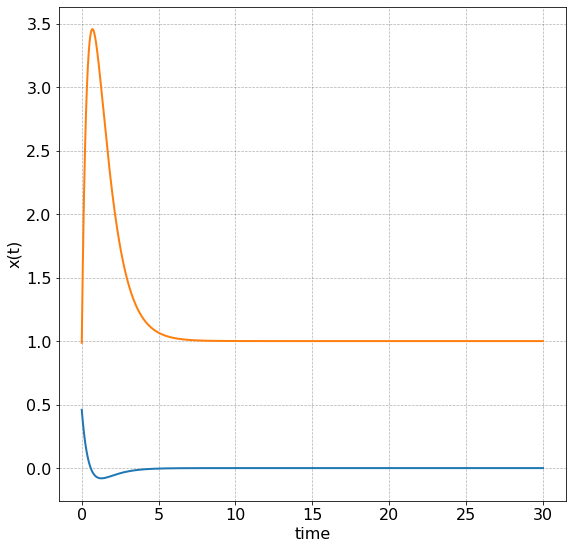

In [ ]:

x_desired = np.array([0, 1])
u_desired = np.array([5])


def StateSpace(x, t):
    u = -K.dot(x - x_desired) + u_desired
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 30, 30000)   
x0 = np.random.rand(n)  # initial state

solution = {"solution_1": odeint(StateSpace, x0, time)}    


plt.rcParams['figure.figsize'] = [20, 20]

# plt.rcParams["font.family"] = "Old Times American"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 'normal'


# plt.subplot(221)
plt.plot(time, solution["solution_1"], linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
# plt.title('autonomous')

## Task 5.1 Design point-to-point control and simulate two systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

K: [[8.875 1.625]]
eigenvalues of A - B*K: [-3. -2.]


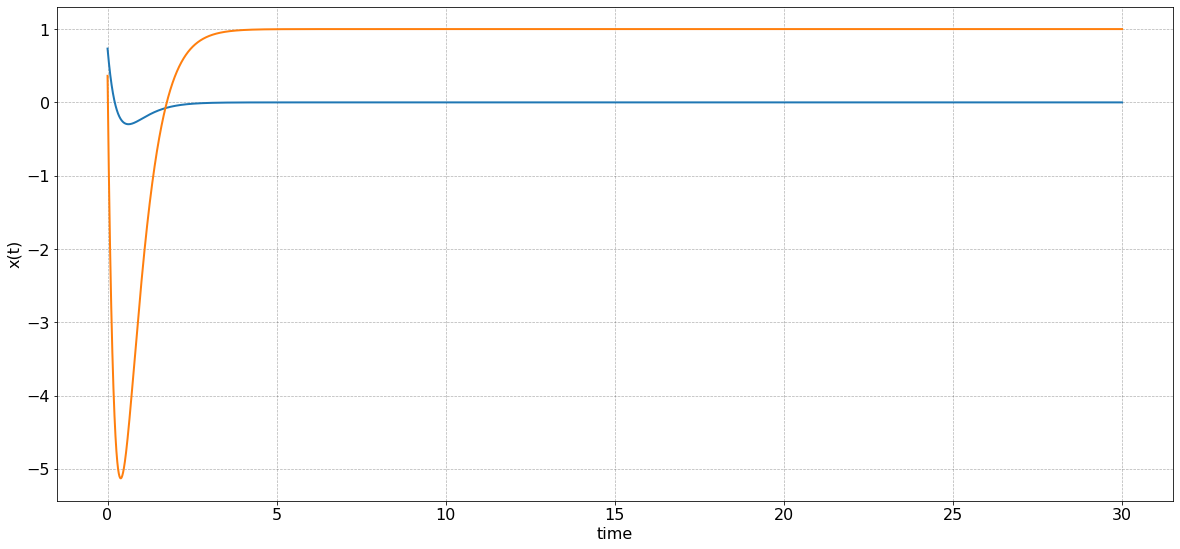

K: [[-0.1         1.1       ]
 [ 2.33333333  2.        ]]
eigenvalues of A - B*K: [-3. -2.]


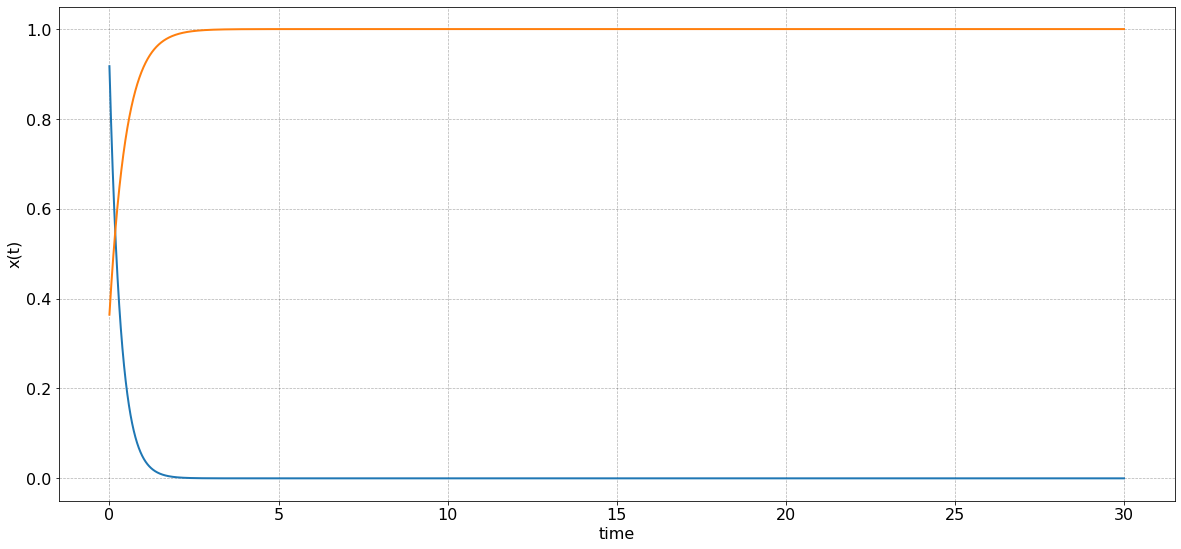

In [ ]:
import numpy as np
from numpy.linalg import eig, pinv
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

n=2

A1 = np.array([[2, 2], [-6, 10]])
B1 = np.array([[1], [5]])

A2 = np.array([[5, -5], [6, 15]])
B2 = np.array([[-10, 3], [10, 3]])

def design_simulate(A,B):
  #desired eigenvalues
  poles = np.array([-3, -2])
  place_obj = place_poles(A, B, poles)

  #found control gains
  K = place_obj.gain_matrix;
  print("K:", K)

  #test that eigenvalues of the closed loop system are what they are supposed to be 
  e, v = eig((A - B.dot(K)))
  print("eigenvalues of A - B*K:", e)


  x_desired = np.array([0, 1])
  u_desired = pinv(B).dot(-A.dot(x_desired))


  def StateSpace(x, t):
      u = -K.dot(x - x_desired) + u_desired
      return A.dot(x) + B.dot(u)

  time = np.linspace(0, 30, 30000)   
  x0 = np.random.rand(n)  # initial state

  solution = odeint(StateSpace, x0, time)    


  plt.rcParams['figure.figsize'] = [20, 20]

  # plt.rcParams["font.family"] = "Old Times American"
  plt.rcParams["font.size"] = 16
  plt.rcParams["font.weight"] = 'normal'


  # plt.subplot(221)
  fig = plt.subplot(211)
  fig.plot(time, solution, linewidth=2)
  fig.set_xlabel('time')
  fig.set_ylabel('x(t)')
  fig.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
  # plt.title('autonomous')
  plt.show()

design_simulate(A1,B1)
design_simulate(A2,B2)

# 6. Discrete systems

Let's consider discrete system: $x_{i+1} = Ax_i + Bu_i$

## Task 6.1

Find which of the followig systems is stable:

$$x_{i+1} = 
\begin{pmatrix} 0.5 & 0.1 \\ -0.05 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} 1 & -2 \\ 0 & 0.3
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -5 & 0 \\ -0.1 & 1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0 \\ 0.5
\end{pmatrix}
u_i, \ \ \ 
u_i = 
\begin{pmatrix} 
0 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -2.2 & -3 \\ 0 & 0.5
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i, \ \ \ 
u_i = 10
$$


## Task 6.2

Propose control that makes the following systems stable:

$$x_{i+1} = 
\begin{pmatrix} 1 & 1 \\ -0.4 & 0.1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0.5 \\ 0.5
\end{pmatrix}
u_i
$$


$$x_{i+1} = 
\begin{pmatrix} 0.8 & -0.3 \\ 0 & 0.15
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i
$$

In [ ]:
#6.1
print("6.1")

import numpy as np
from numpy.linalg import eig, pinv
from scipy.integrate import odeint
from scipy.signal import place_poles

A1 = np.array([[0.5, 0.1], [-0.05, 0.2]])
A2 = np.array([[1, -2], [0, 0.3]])
A3 = np.array([[-5, 0], [-0.1, 1]])
A4 = np.array([[-2.2, -3], [0, 0.5]])

B3 = np.array([[0], [0.5]])
B4 = np.array([[-1], [1]])

U3 = np.array([[0, 0.2]])
U4 = 10

def stable(M):
  return all(abs(x) <= 1 for x in eig(M)[0])

if stable(A1):
  print("System 1 is stable")
else:
  print("System 1 is unstable")

if stable(A2):
  print("System 2 is stable")
else:
  print("System 2 is unstable")

if stable(A3 + B3.dot(U3)):
  print("System 3 is stable")
else:
  print("System 3 is unstable")

if stable(A4 + B4.dot(U4)):
  print("System 4 is stable")
else:
  print("System 4 is unstable")


#6.2
print("\n\n\n\n6.2")
A5 = np.array([[1, 1], [-0.4, 0.1]])
A6 = np.array([[0.8, -0.3], [0, 0.15]])
B5 = np.array([[0.5], [0.5]])
B6 = np.array([[-1], [1]])

A = [A5, A6]
B = [B5, B6]

for M, N in zip(A,B):
  U = np.random.rand(1,2)
  while not stable(M + N.dot(U)):
    U = np.random.rand(1,2)
  print("Proposed matrix U for system:", U, "\n")

6.1
System 1 is stable
System 2 is stable
System 3 is unstable
System 4 is unstable




6.2
Proposed matrix U for system: [[0.27397761 0.76946221]] 

Proposed matrix U for system: [[0.42658842 0.44049448]] 



## Simulation of descrete systems

Consider the system: $x_{i+1} = Ax_i$. Let us pick values for the matrix $A$ and simulate it forward.

eigenvalues of A: [ 0.83898669 -0.73898669]


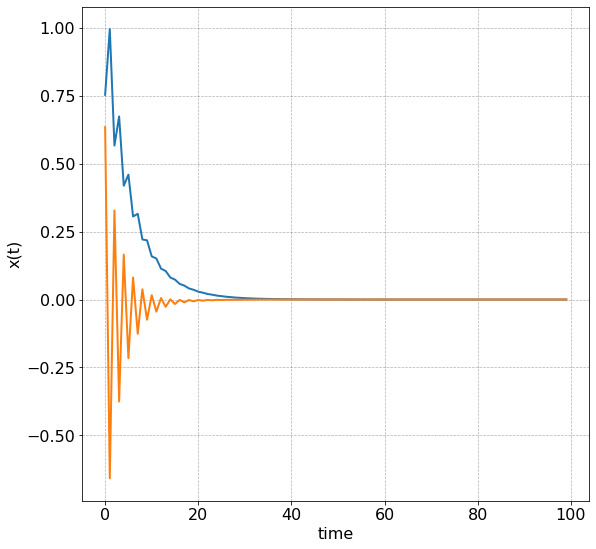

In [ ]:
A = np.array([[0.9, 0.5], [-0.2, -0.8]])

e, v = eig((A))
print("eigenvalues of A:", e)

Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(n)  # initial state
solution = np.zeros((Count, 2))
solution[0, :] = x0

for i in range(0, Count-1):
    x = solution[i, :]
    x = A.dot(x)
    solution[i+1, :] = np.reshape(x, (1, 2))
    time[i] = dt*i

plt.subplot(221)
plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)

## Task 6.3 Design point-to-point control and simulate two discrete systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

K: [[-0.67741379  1.06057471]]
eigenvalues of A - B*K: [-0.7  0.8]


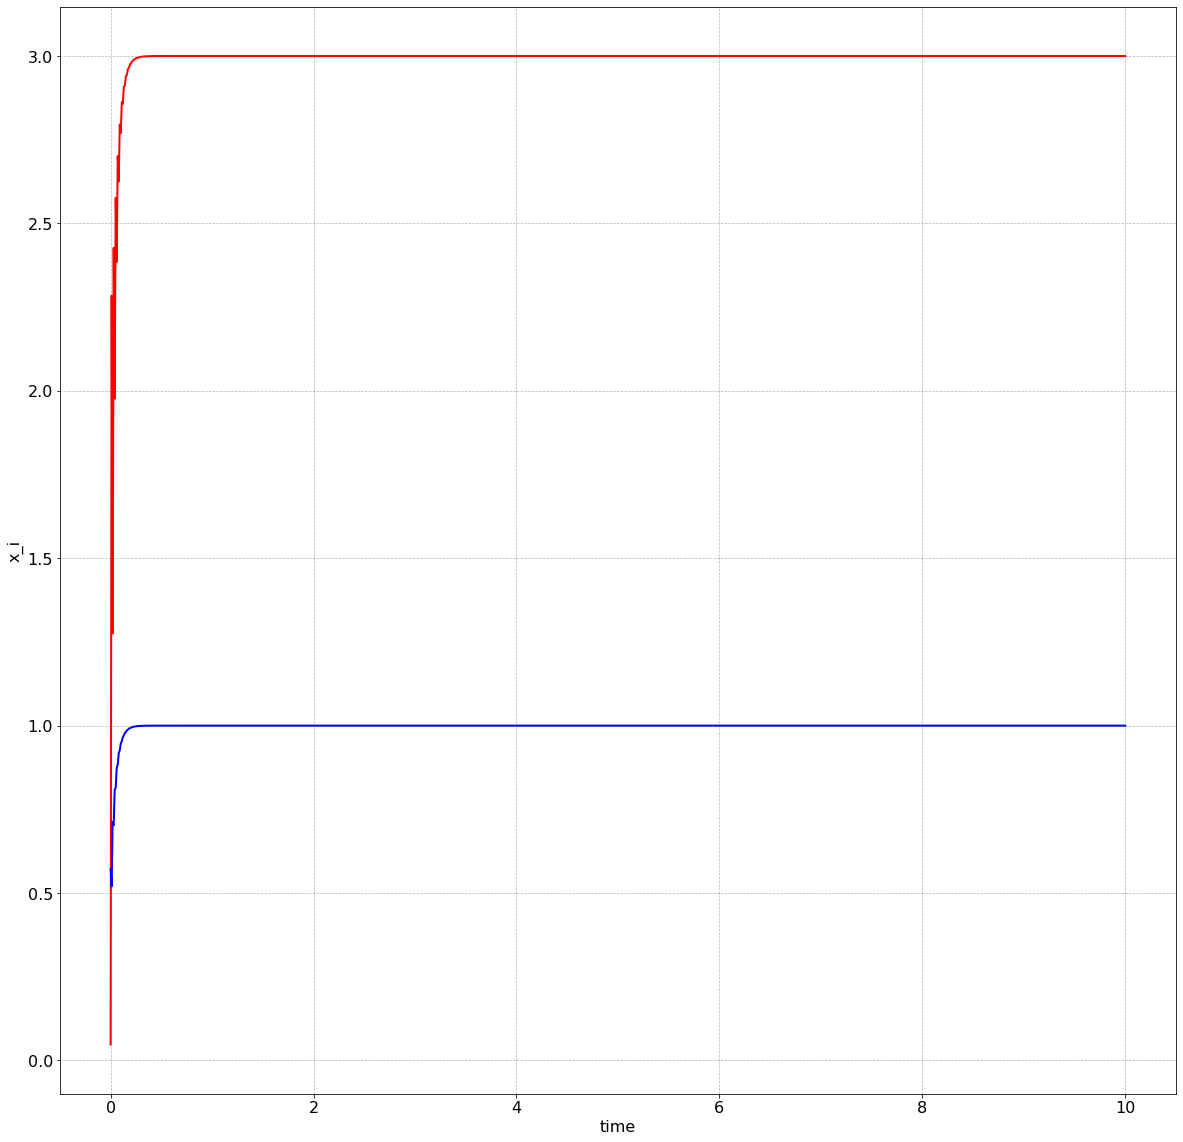

K: [[0.015      0.96      ]
 [1.95       1.53333333]]
eigenvalues of A - B*K: [-0.7  0.8]


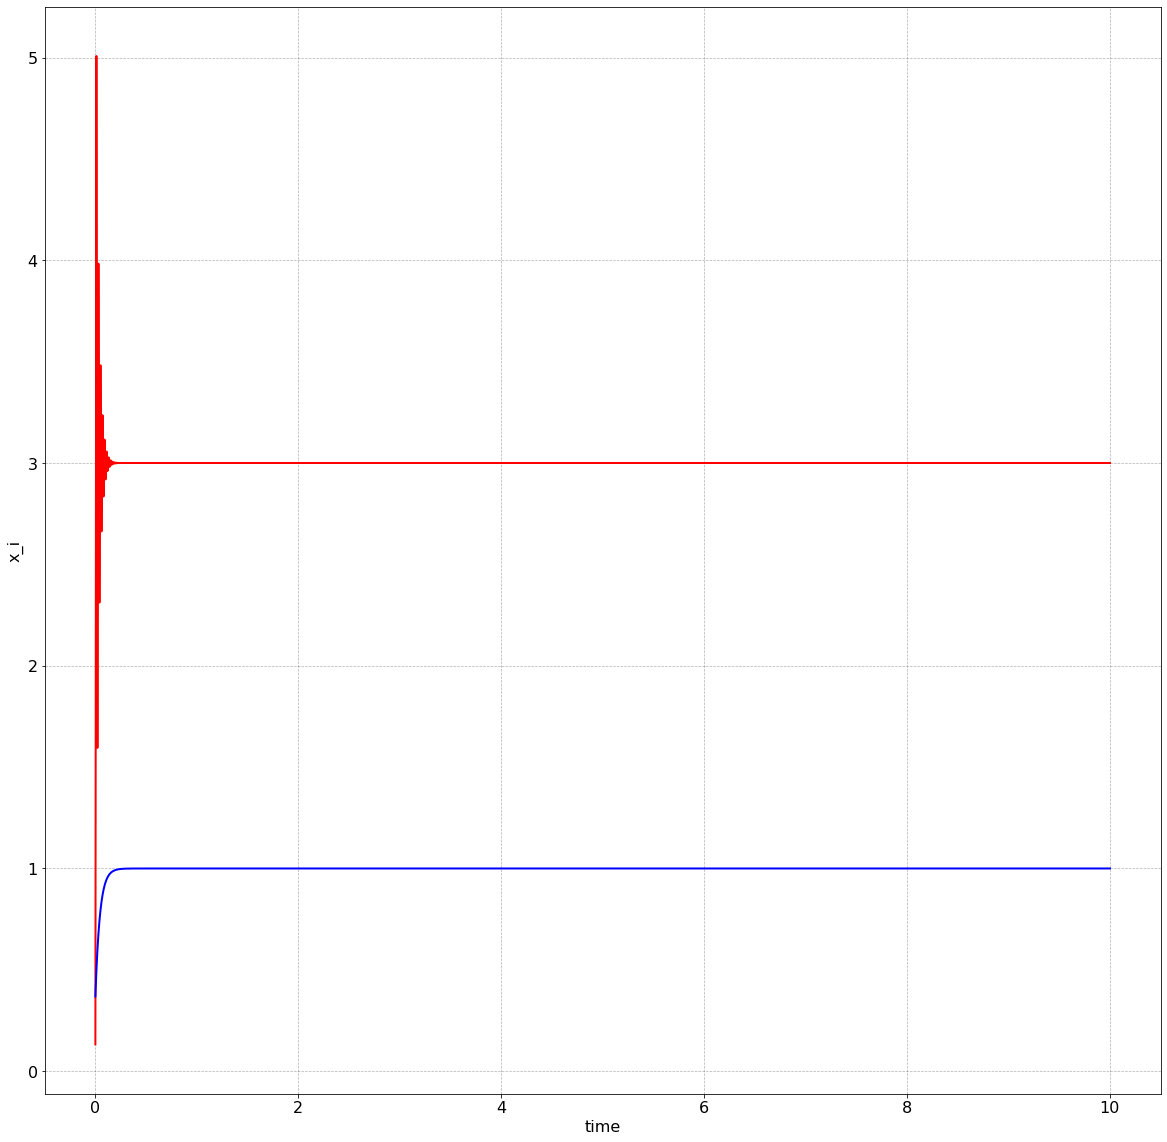

In [ ]:
import numpy as np
from numpy.linalg import eig, pinv
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

n=2

A1 = np.array([[1.0, 2.0], [-6.0, 10.0]])
B1 = np.array([[-2], [9.0]])

A2 = np.array([[5.0, -5.0], [6.0, 15.0]])
B2 = np.array([[-10.0, 3.0], [10.0, 3.0]])

def design_simulate(A,B):
  #desired eigenvalues
  poles = np.array([-0.7, 0.8])
  place_obj = place_poles(A, B, poles)

  #found control gains
  K = place_obj.gain_matrix;
  print("K:", K)

  #test that eigenvalues of the closed loop system are what they are supposed to be 
  e, v = eig((A - B.dot(K)))
  print("eigenvalues of A - B*K:", e)

  time = np.linspace(0, 10, 1000)
  x0 = np.random.rand(n)  # initial state
  x_desired = np.array([3, 1])
  u_desired = pinv(B).dot(np.eye(n)-A).dot(x_desired)
  if B.shape == (n,n):
    u = np.zeros((len(time), n))
  elif B.shape == (n,1):
    u = np.zeros(len(time))
  x = np.zeros((len(time), n))
  x[0] = x0


  for i in range(len(time)-1):
    u[i] = -K.dot(x[i] - x_desired) + u_desired
    if B.shape == (n,n):
      x[i+1] = A.dot(x[i]) + B.dot(u[i])
    elif B.shape == (n,1):
      x[i+1] = (A.dot(x[i].reshape(2,1)) + B.dot(u[i])).reshape(2,)


  plt.rcParams['figure.figsize'] = [20, 20]

  # plt.rcParams["font.family"] = "Old Times American"
  plt.rcParams["font.size"] = 16
  plt.rcParams["font.weight"] = 'normal'


  # plt.subplot(221)
  fig = plt.subplot(111)
  fig.plot(time, x[:, 0], linewidth=2, color = 'r')
  fig.plot(time, x[:, 1], linewidth=2, color = 'b')  
  fig.set_xlabel('time')
  fig.set_ylabel('x_i')
  fig.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
  # plt.title('autonomous')
  plt.show()

design_simulate(A1,B1)
design_simulate(A2,B2)

# 7 Lyapunov equations

Solve Lyapunov equations for both discrete and continious systems to prove stability

In [ ]:
from scipy.linalg import solve_continuous_lyapunov
from scipy.linalg import solve_discrete_lyapunov


Q = np.array([[-1, 0], [0, -1]])

A = np.array([[-10, 5], [-5, -10]])
e, v = eig(A)
print("eig(A)", e)

P = solve_continuous_lyapunov(A, Q)
print("P", P)
e, v = eig((A.transpose().dot(P) + P.dot(A)))
print("eig(A'P + P*A)", e)
print(" ")
print(" ")


A = np.array([[0.9, 0.5], [-0.2, -0.8]])
e, v = eig(A)
print("eig(A)", e)

P = solve_discrete_lyapunov(A, Q)
print("P", P)
print("(A'PA - P + Q ):")
print(((A.dot(P)).dot(A.transpose()) - P + Q))




eig(A) [-10.+5.j -10.-5.j]
P [[ 5.00000000e-02  7.34706413e-20]
 [-1.24900090e-18  5.00000000e-02]]
eig(A'P + P*A) [-1. -1.]
 
 
eig(A) [ 0.83898669 -0.73898669]
P [[-4.03347296  0.9268445 ]
 [ 0.9268445  -2.40207966]]
(A'PA - P + Q ):
[[0.00000000e+00 3.33066907e-16]
 [1.11022302e-16 4.44089210e-16]]


## Task 7.1 

Choose one of the continious and one of the discrete systems for which you designed control, and prove stability of the closed-loop version $(A - BK)$